# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_PlayStationApp_1.csv")
df.head()

,userName,score,at,content
0,crus Of,1,2024-08-29 13:51:29,Apk ini enak di hapus aja di plastore apk buri...
1,fauzan azhari,5,2024-08-28 01:15:39,turunkan harga game day gone beri konsumen har...
2,Toggy Mamora,5,2024-08-25 04:38:47,Oke... Bagus... Cool...
3,M AZEL ARTA S,3,2024-08-24 01:24:47,Please Adakan kirim kode selain dari gmail don...
4,Rahmat Jadino,5,2024-08-23 03:12:31,"beri gue bintang 7, puuuuciiing loch gue @#!!$..."


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Apk ini enak di hapus aja di plastore apk buri...
1,turunkan harga game day gone beri konsumen har...
2,Oke... Bagus... Cool...
3,Please Adakan kirim kode selain dari gmail don...
4,"beri gue bintang 7, puuuuciiing loch gue @#!!$..."
...,...
1495,👍
1496,Mosh avelable
1497,Mantul
1498,Code error ketika ingin sign in. Harap segera ...


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,1500
unique,1254
top,Ok
freq,74


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1500, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1254, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

<ipython-input-14-593aa74adfad>:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()


,content,cleaning
0,Apk ini enak di hapus aja di plastore apk buri...,apk ini enak di hapus aja di plastore apk buri...
1,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...
2,Oke... Bagus... Cool...,oke bagus cool
3,Please Adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...
4,"beri gue bintang 7, puuuuciiing loch gue @#!!$...",beri gue bintang puuuuciiing loch gue
...,...,...
1491,Dedop pokokne,dedop pokokne
1493,Ago tingkatkan lagi,ago tingkatkan lagi
1496,Mosh avelable,mosh avelable
1498,Code error ketika ingin sign in. Harap segera ...,code error ketika ingin sign in harap segera a...


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Apk ini enak di hapus aja di plastore apk buri...,apk ini enak di hapus aja di plastore apk buri...,aplikasi ini enak di hapus aja di plastore apl...
1,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...
2,Oke... Bagus... Cool...,oke bagus cool,oke bagus cool
3,Please Adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...
4,"beri gue bintang 7, puuuuciiing loch gue @#!!$...",beri gue bintang puuuuciiing loch gue,beri gue bintang puuuuciiing loch gue
...,...,...,...
1491,Dedop pokokne,dedop pokokne,dedop pokenapane
1493,Ago tingkatkan lagi,ago tingkatkan lagi,ago tinggaatkan lagi
1496,Mosh avelable,mosh avelable,mosh avelable
1498,Code error ketika ingin sign in. Harap segera ...,code error ketika ingin sign in harap segera a...,code error ketika ingin sign in harap segera a...


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Apk ini enak di hapus aja di plastore apk buri...,apk ini enak di hapus aja di plastore apk buri...,aplikasi ini enak di hapus aja di plastore apl...,aplikasi enak hapus aja plastore aplikasi buri...
1,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...
2,Oke... Bagus... Cool...,oke bagus cool,oke bagus cool,oke bagus cool
3,Please Adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...
4,"beri gue bintang 7, puuuuciiing loch gue @#!!$...",beri gue bintang puuuuciiing loch gue,beri gue bintang puuuuciiing loch gue,beri gue bintang puuuuciiing loch gue
...,...,...,...,...
1491,Dedop pokokne,dedop pokokne,dedop pokenapane,dedop pokenapane
1493,Ago tingkatkan lagi,ago tingkatkan lagi,ago tinggaatkan lagi,ago tinggaatkan
1496,Mosh avelable,mosh avelable,mosh avelable,mosh avelable
1498,Code error ketika ingin sign in. Harap segera ...,code error ketika ingin sign in harap segera a...,code error ketika ingin sign in harap segera a...,code error ketika ingin sign in harap segera a...


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Apk ini enak di hapus aja di plastore apk buri...,apk ini enak di hapus aja di plastore apk buri...,aplikasi ini enak di hapus aja di plastore apl...,aplikasi enak hapus aja plastore aplikasi buri...,"[aplikasi, enak, hapus, aja, plastore, aplikas..."
1,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...,turunkan harga game day gone beri konsumen har...,"[turunkan, harga, game, day, gone, beri, konsu..."
2,Oke... Bagus... Cool...,oke bagus cool,oke bagus cool,oke bagus cool,"[oke, bagus, cool]"
3,Please Adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...,please adakan kirim kode selain dari gmail don...,"[please, adakan, kirim, kode, selain, dari, gm..."
4,"beri gue bintang 7, puuuuciiing loch gue @#!!$...",beri gue bintang puuuuciiing loch gue,beri gue bintang puuuuciiing loch gue,beri gue bintang puuuuciiing loch gue,"[beri, gue, bintang, puuuuciiing, loch, gue]"
...,...,...,...,...,...
1491,Dedop pokokne,dedop pokokne,dedop pokenapane,dedop pokenapane,"[dedop, pokenapane]"
1493,Ago tingkatkan lagi,ago tingkatkan lagi,ago tinggaatkan lagi,ago tinggaatkan,"[ago, tinggaatkan]"
1496,Mosh avelable,mosh avelable,mosh avelable,mosh avelable,"[mosh, avelable]"
1498,Code error ketika ingin sign in. Harap segera ...,code error ketika ingin sign in harap segera a...,code error ketika ingin sign in harap segera a...,code error ketika ingin sign in harap segera a...,"[code, error, ketika, ingin, sign, in, harap, ..."


# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_PlayStationApp_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_PlayStationApp_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,apk enak hapus aja plastore apk burik mau masu...
1,turun harga game day gone beri konsumen harga ...
2,oke bagus cool
3,please adakan kirim kode selain dari gmail don...
4,beri gue bintang puuuuciiing loch gue
...,...
1249,dedop pokokne
1250,ago tingkat
1251,mosh avelable
1252,code error ketika ingin sign in harap segera atas


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

# # Import Library yang dibutuhkan

# import pandas as pd
# from easynmt import EasyNMT

# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_PlayStationApp_1.csv', encoding = 'latin1')

# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

# # Load Model EasyMNT
# model = EasyNMT('opus-mt')  # You can choose a different model name here

# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')

# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PlayStationApp_1.csv')

In [22]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PlayStationApp_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,apk enak hapus aja plastore apk burik mau masu...,"fontcolor="" # FFFF00""apk good fontcolor="" # FF..."
1,turun harga game day gone beri konsumen harga ...,Down to game day gone. Give consumers a big cu...
2,oke bagus cool,Okay. Good. Cool.
3,please adakan kirim kode selain dari gmail don...,Please send code other than gmail dong or gmai...
4,beri gue bintang puuuuciiing loch gue,Give me the star of loch puuuiciating.
...,...,...
1249,dedop pokokne,tree dedop
1250,ago tingkat,ago level
1251,mosh avelable,mosh alvelable
1252,code error ketika ingin sign in harap segera atas,code error when wanting to sign in please imme...


# **Labeling**

In [23]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_PlayStationApp_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,apk enak hapus aja plastore apk burik mau masu...,"fontcolor="" # FFFF00""apk good fontcolor="" # FF..."
1,turun harga game day gone beri konsumen harga ...,Down to game day gone. Give consumers a big cu...
2,oke bagus cool,Okay. Good. Cool.
3,please adakan kirim kode selain dari gmail don...,Please send code other than gmail dong or gmai...
4,beri gue bintang puuuuciiing loch gue,Give me the star of loch puuuiciating.
...,...,...
1249,dedop pokokne,tree dedop
1250,ago tingkat,ago level
1251,mosh avelable,mosh alvelable
1252,code error ketika ingin sign in harap segera atas,code error when wanting to sign in please imme...


In [24]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [25]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [26]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 422
Netral = 588
Negatif = 244

Total Data Seluruhnya : 1254


In [27]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,apk enak hapus aja plastore apk burik mau masu...,"fontcolor="" # FFFF00""apk good fontcolor="" # FF...",Positif
1,turun harga game day gone beri konsumen harga ...,Down to game day gone. Give consumers a big cu...,Negatif
2,oke bagus cool,Okay. Good. Cool.,Positif
3,please adakan kirim kode selain dari gmail don...,Please send code other than gmail dong or gmai...,Negatif
4,beri gue bintang puuuuciiing loch gue,Give me the star of loch puuuiciating.,Netral
...,...,...,...
1249,dedop pokokne,tree dedop,Netral
1250,ago tingkat,ago level,Netral
1251,mosh avelable,mosh alvelable,Netral
1252,code error ketika ingin sign in harap segera atas,code error when wanting to sign in please imme...,Positif


In [28]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,apk enak hapus aja plastore apk burik mau masu...,"fontcolor="" # FFFF00""apk good fontcolor="" # FF...",Positif
1,turun harga game day gone beri konsumen harga ...,Down to game day gone. Give consumers a big cu...,Negatif
2,oke bagus cool,Okay. Good. Cool.,Positif
3,please adakan kirim kode selain dari gmail don...,Please send code other than gmail dong or gmai...,Negatif
4,beri gue bintang puuuuciiing loch gue,Give me the star of loch puuuiciating.,Netral
...,...,...,...
1249,dedop pokokne,tree dedop,Netral
1250,ago tingkat,ago level,Netral
1251,mosh avelable,mosh alvelable,Netral
1252,code error ketika ingin sign in harap segera atas,code error when wanting to sign in please imme...,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



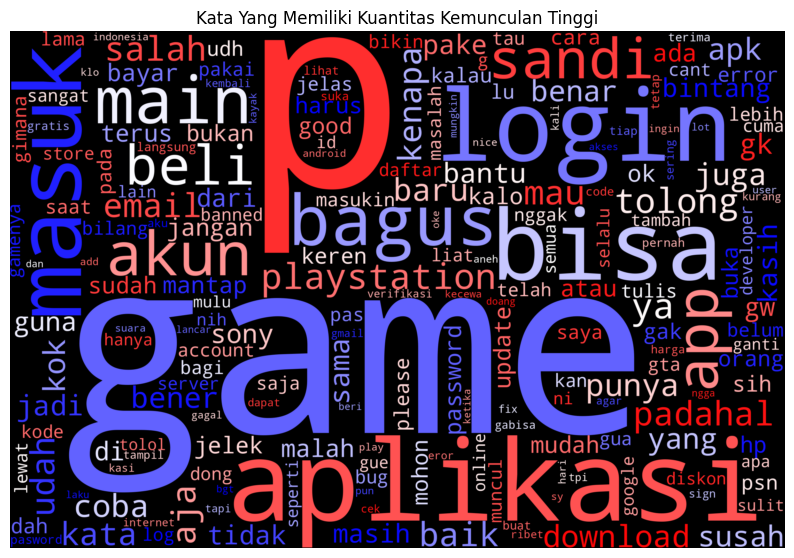

In [29]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


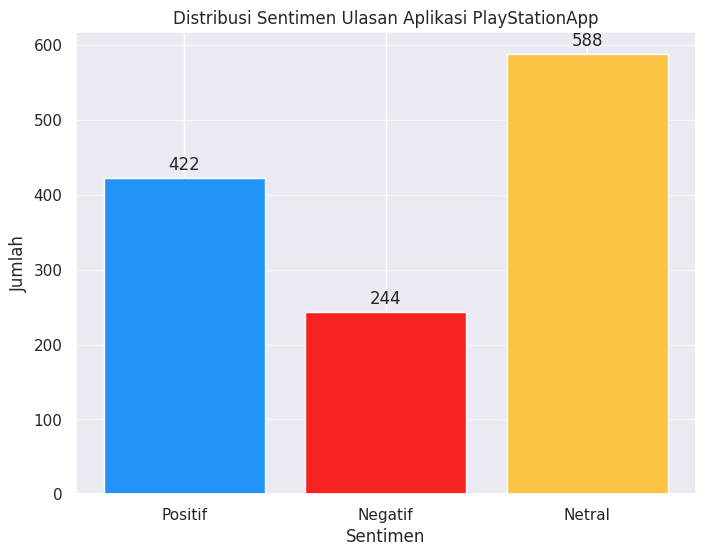

In [30]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PlayStationApp")


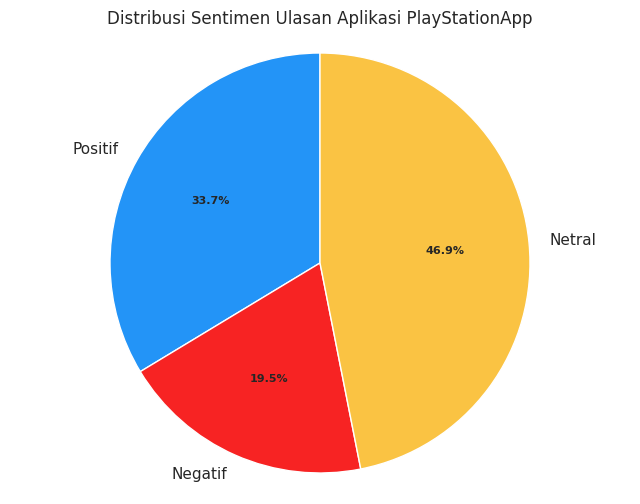

In [31]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PlayStationApp")

In [32]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,apk enak hapus aja plastore apk burik mau masu...,"fontcolor="" # FFFF00""apk good fontcolor="" # FF...",Positif
1,turun harga game day gone beri konsumen harga ...,Down to game day gone. Give consumers a big cu...,Negatif
2,oke bagus cool,Okay. Good. Cool.,Positif
3,please adakan kirim kode selain dari gmail don...,Please send code other than gmail dong or gmai...,Negatif
5,aplikasi kntlaku udah masukin kata sandi akun ...,My client application entered the account pass...,Negatif
...,...,...,...
1243,susah kudu daftar dlu bru maen ituh gx lngsung...,It's hard to make a list of bru maen that gx g...,Negatif
1245,hai nama ku ewin ngak little big planet,Hi. My name is Ewin. It's a little big planet.,Negatif
1246,ok ywd gni aja,ok ywd gni just,Positif
1252,code error ketika ingin sign in harap segera atas,code error when wanting to sign in please imme...,Positif


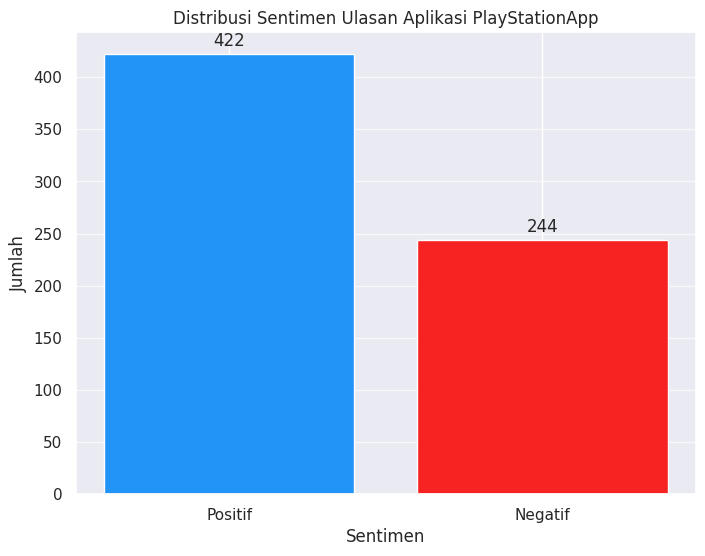

In [33]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PlayStationApp")


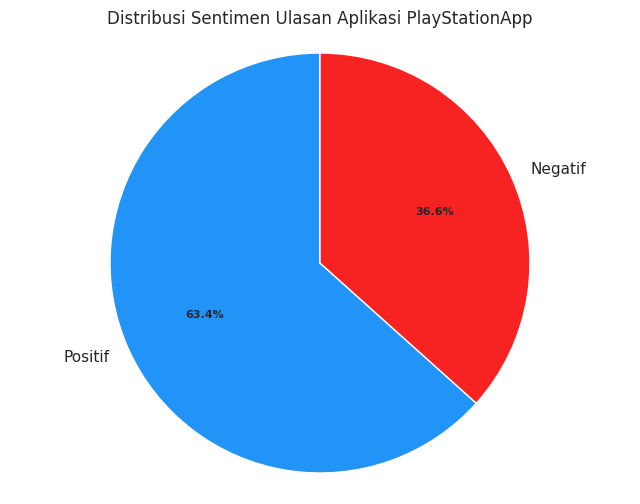

In [34]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PlayStationApp")

In [35]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,apk enak hapus aja plastore apk burik mau masu...,"fontcolor="" # FFFF00""apk good fontcolor="" # FF...",0
1,turun harga game day gone beri konsumen harga ...,Down to game day gone. Give consumers a big cu...,1
2,oke bagus cool,Okay. Good. Cool.,0
3,please adakan kirim kode selain dari gmail don...,Please send code other than gmail dong or gmai...,1
5,aplikasi kntlaku udah masukin kata sandi akun ...,My client application entered the account pass...,1
...,...,...,...
1243,susah kudu daftar dlu bru maen ituh gx lngsung...,It's hard to make a list of bru maen that gx g...,1
1245,hai nama ku ewin ngak little big planet,Hi. My name is Ewin. It's a little big planet.,1
1246,ok ywd gni aja,ok ywd gni just,0
1252,code error ketika ingin sign in harap segera atas,code error when wanting to sign in please imme...,0


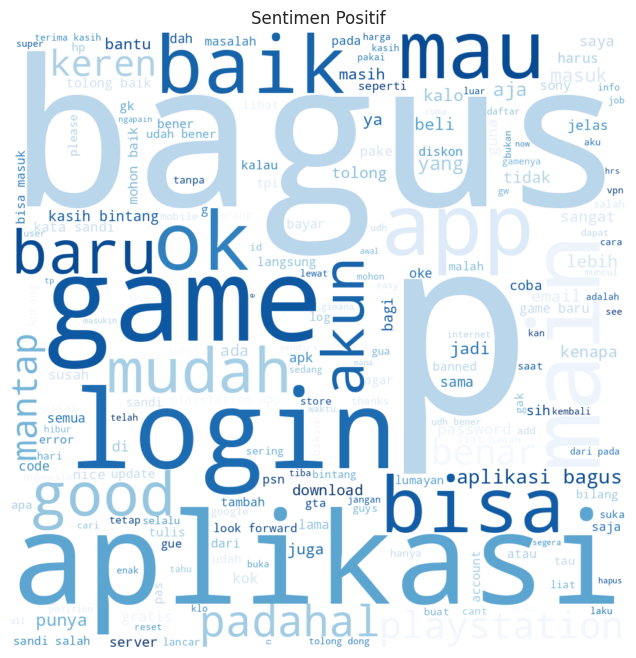

In [36]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

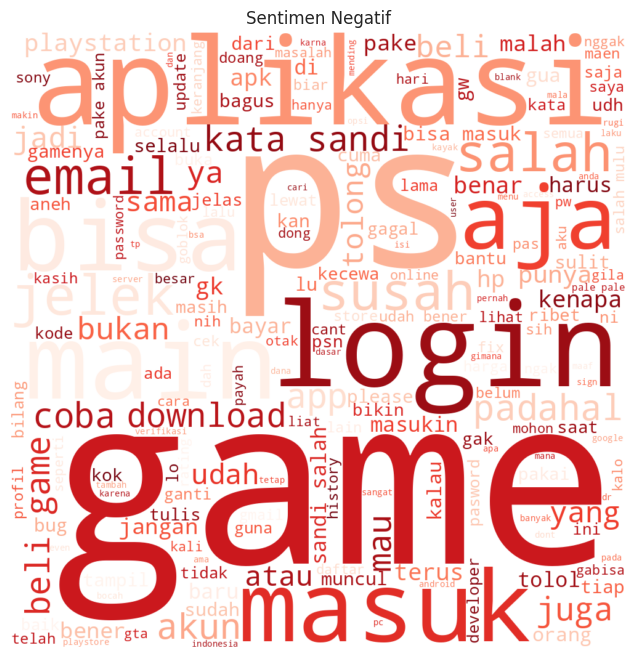

In [37]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

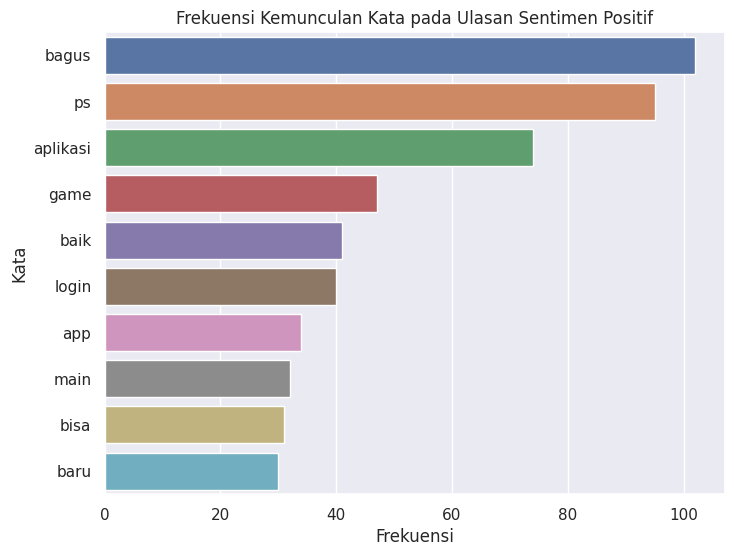

In [38]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [39]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        102
      ps         95
aplikasi         74
    game         47
    baik         41
   login         40
     app         34
    main         32
    bisa         31
    baru         30


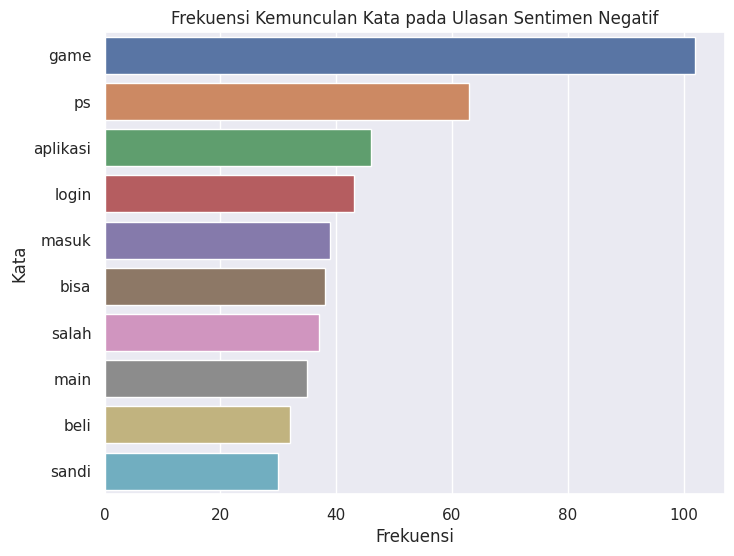

In [40]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [41]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
    game        102
      ps         63
aplikasi         46
   login         43
   masuk         39
    bisa         38
   salah         37
    main         35
    beli         32
   sandi         30


In [42]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,422
1,244


# **Transormation & Data Preparation**

In [43]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [45]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

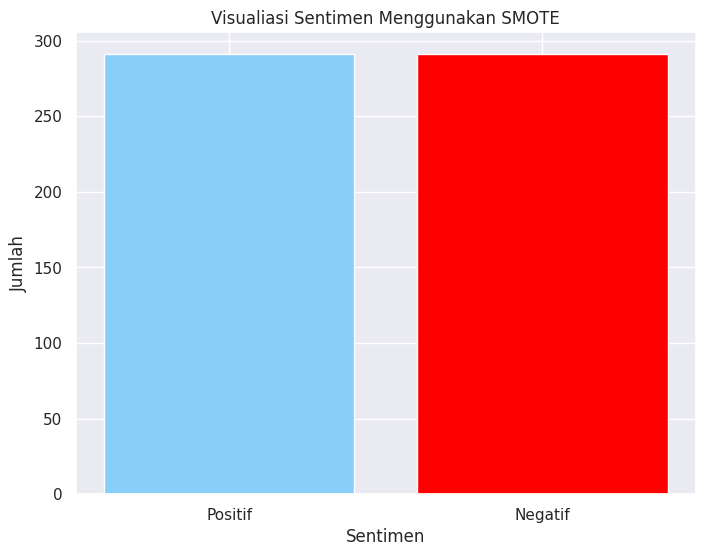

In [46]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [47]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [48]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.73
Akurasi untuk c = 0.05: 0.755
Akurasi untuk c = 0.25: 0.755
Akurasi untuk c = 0.5: 0.76
Akurasi untuk c = 0.75: 0.76
Akurasi untuk c = 1: 0.765


In [50]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [51]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.765 


In [52]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.7650

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       131
           1       0.65      0.68      0.67        69

    accuracy                           0.77       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.77      0.77      0.77       200



In [53]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[106  25]
 [ 22  47]]

True Positives (TP) =  106

True Negatives (TN) =  47

False Positives (FP) =  25

False Negatives (FN) =  22

Accuracy =  0.765


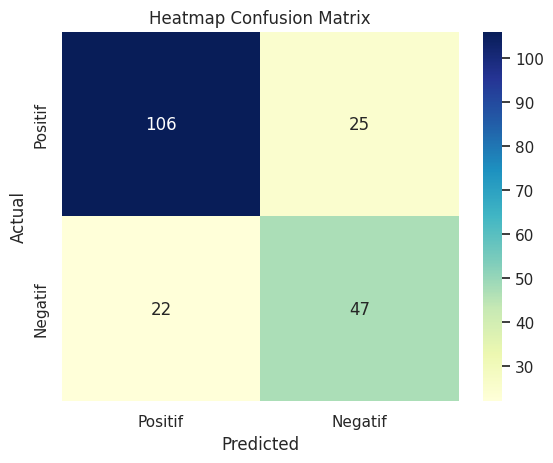

In [54]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [55]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [56]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7650


In [57]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2350


# **Testing**

In [58]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Saya tidak bisa sign in. Gagal terus, mohon PlayStation untuk memperbaiki ini
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 57.14%
Probabilitas: 57.14245659260605 %


In [59]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : aplikasi yang bagus..pembayaran jg mudah kok..tinggal beli Ps gift dari tokped dll... masukin e wallet..tinggal bayar lewat itu mudah kok
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 89.58%
Probabilitas: 89.58000555711453 %
